# Exploratory analysis : NLP FOMC Project

In [126]:
#!pip install wordcloud

In [323]:
import numpy as np
import pandas as pd
from urllib import request
import bs4
from wordcloud import WordCloud, STOPWORDS 
from tqdm.notebook import trange
import matplotlib.pyplot as plt
import re

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [431]:
df = pd.read_csv("/Users/h2jw/Documents/GitHub/NLP-FOMC/RA_project/final_df_v4.csv", low_memory=True)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [432]:
df  = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126782 entries, 0 to 126781
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               126782 non-null  object 
 1   interlocutor_name  126782 non-null  object 
 2   statement _size    126782 non-null  int64  
 3   statement          126725 non-null  object 
 4   statement_number   126782 non-null  object 
 5   chair_in_charge    126782 non-null  object 
 6   score_acadam       126782 non-null  float64
 7   score_hostile      126782 non-null  float64
 8   score_econo        126782 non-null  float64
 9   score_virtue       126782 non-null  float64
 10  score_vice         126782 non-null  float64
 11  score_hawkish      126782 non-null  float64
 12  score_posi         126782 non-null  float64
 13  score_affi         126782 non-null  float64
 14  score_uncert       126782 non-null  float64
 15  Affil              126782 non-null  float64
 16  Ho

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [433]:
df.head()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_acadam,score_hostile,score_econo,score_virtue,...,NUMB,Yes,No,Negate,SureLw,If,NotLw,RspGain,ABS,Causal
0,1976-08-17,CHAIRMAN BURNS,41,we are ready to start our meeting this morning...,statement_0,CHAIRMAN BURNS,0.0,0.04878,0.024390,0.048780,...,0.048780,0.0,0.02439,0.024390,0.048780,0.000000,0.024390,0.02439,0.024390,0.024390
1,1976-08-17,MR HOLMES,2,statementsee appendix,statement_1,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,1976-08-17,MR BLACK,27,alan do you think that through realignment of ...,statement_2,CHAIRMAN BURNS,0.0,0.00000,0.037037,0.037037,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.074074,0.037037
3,1976-08-17,MR HOLMES,49,there are two alternatives one that everybody ...,statement_3,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.081633,0.0,0.00000,0.020408,0.020408,0.040816,0.020408,0.00000,0.061224,0.020408
4,1976-08-17,MR BLACK,8,which do you think would be more likely?,statement_4,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000


## Preprocessing

La base s'arrête en 2014, on va rajouter le scrapping de 2015 avec les codes contenus dans `codes scrapping`.

In [434]:
# add 2015 update
df.Date = df.Date.astype('datetime64')

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Chairs

In [435]:
pd.unique(df.chair_in_charge)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CHAIRMAN BURNS', 'CHAIRMAN MILLER', 'CHAIRMAN VOLCKER',
       'CHAIRMAN GREENSPAN', 'CHAIRMAN BERNANKE', 'CHAIR YELLEN'],
      dtype=object)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Chair person')

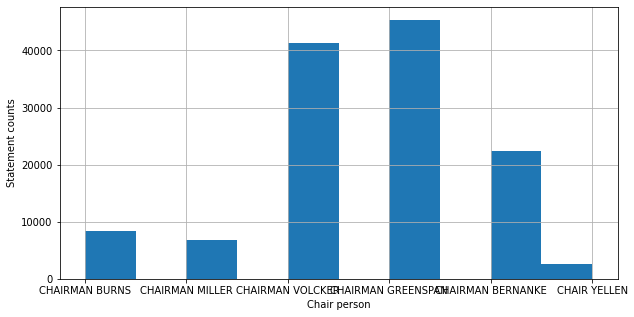

In [436]:
plt.figure(figsize=(10,5))
df['chair_in_charge'].hist()
plt.ylabel('Statement counts')
plt.xlabel('Chair person')

In [437]:
#pd.unique(df['interlocutor_name'])

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [438]:
def name_cleaning(name_list):
    # Removing punctuations in string
    # Using regex
    cleaned = []
    stopname_list=['CHAIRMAN', 'MS', 'VICE', 'MR']
    for name in name_list:
        res = re.sub(r'[^\w\s]', '', name)
        # printing result
        # print("The string after punctuation filter : " + res)
        
        res = ' '.join([word for word in res.split() if word not in stopname_list])
        cleaned.append(res)
    return cleaned
def get_role(name_list):
    role = []
    stopname_list=['CHAIRMAN', 'MS', 'VICE', 'MR']
    for name in name_list:
        res = re.sub(r'[^\w\s]', '', name)
        res = ' '.join([word for word in res.split() if word in stopname_list])
        role.append(res)
        
    return role

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [439]:
df['role_int']= get_role(df.interlocutor_name.tolist())
df['interlocutor_name']=name_cleaning(df.interlocutor_name.tolist())

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [440]:
pd.unique(df.interlocutor_name)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['BURNS', 'HOLMES', 'BLACK', 'PARDEE', 'COLDWELL', 'PARTEE',
       'EASTBURN', 'WALLICH', 'JACKSON', 'GARDNER', 'BAUGHMAN', 'GRAMLEY',
       'WINN', 'KIMBREL', 'AXILROD', 'MAYO', 'WILLIAMS', 'GUFFEY',
       'MORRIS', 'VOLCKER', 'MACLAURY', 'BROIDA', 'ZEISEL', 'BALLES',
       'STERNLIGHT', 'LILLY', 'ROOS', 'MACCLAURY', 'PAULUS', 'REYNOLDS',
       'VAN', 'KICHLINE', 'WILLES', 'FOSSUM', 'MEEK', 'ALTMANN', 'TRUMAN',
       'RANKIN', 'COYNE', 'SICILIANO', 'SMOOT', 'WILLIS', 'ETTIN',
       'GUENTHER', 'WALLACE', 'MAYOMR', 'MILLER', 'DENKLER', 'MORIARTY',
       'CZERWINSKI', 'TEETERS', 'OCONNELL', 'BAUGHWJV', 'MACDONALD',
       'ALTMA', 'HOMES', 'GAINOR', 'WALLJCH', 'MCINTOSH', 'GREENE',
       'RICE', 'FARNSWORTH', 'ROBINSON', 'TIMLEN', 'PRELL', 'SCHULTZ',
       'VOLCRER', 'KIMEREL', 'SCWLTZ', 'VOLCKFR', 'BECK', 'SIMPSON',
       'LINDSEY', 'KERAN', 'FORRESTAL', 'SOLOMON', 'PETERSEN', 'FORD',
       'KEIR', 'CORRIGAN', 'GRALEY', 'OLTMAN', 'BOEHNE', 'BOYKIN',
       'DOYLE', 'K

In [334]:
df_small = df.head(40000)
df_small = df_small.groupby('interlocutor_name').agg({'statement':'count'})

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:ylabel='statement'>

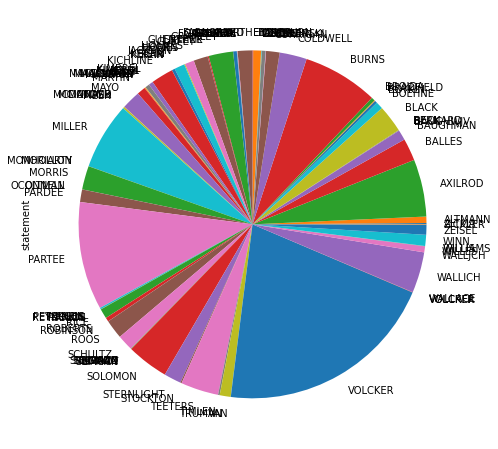

In [335]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
df_small.statement.plot.pie()

### Statements

In [441]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /Users/h2jw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [442]:
df.statement = df.statement.astype('string')
df = df.dropna()
df.statement = df.statement.str.replace(' ', ',')
#df.statement = df.statement.str.lower().str.split()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [450]:
df['statement2'] = df.statement.str.lower().str.split()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [451]:
df.head()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_acadam,score_hostile,score_econo,score_virtue,...,No,Negate,SureLw,If,NotLw,RspGain,ABS,Causal,role_int,statement2
0,1976-08-17,BURNS,41,"we,are,ready,to,start,our,meeting,this,morning...",statement_0,CHAIRMAN BURNS,0.0,0.04878,0.024390,0.048780,...,0.02439,0.024390,0.048780,0.000000,0.024390,0.02439,0.024390,0.024390,CHAIRMAN,"[we,are,ready,to,start,our,meeting,this,mornin..."
1,1976-08-17,HOLMES,2,"statementsee,appendix",statement_1,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,MR,"[statementsee,appendix]"
2,1976-08-17,BLACK,27,"alan,do,you,think,that,through,realignment,of,...",statement_2,CHAIRMAN BURNS,0.0,0.00000,0.037037,0.037037,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.074074,0.037037,MR,"[alan,do,you,think,that,through,realignment,of..."
3,1976-08-17,HOLMES,49,"there,are,two,alternatives,one,that,everybody,...",statement_3,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.00000,0.020408,0.020408,0.040816,0.020408,0.00000,0.061224,0.020408,MR,"[there,are,two,alternatives,one,that,everybody..."
4,1976-08-17,BLACK,8,"which,do,you,think,would,be,more,likely?",statement_4,CHAIRMAN BURNS,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000,MR,"[which,do,you,think,would,be,more,likely?]"


In [469]:
for row in df.statement2.head(5):
    print(row[0])

we,are,ready,to,start,our,meeting,this,morning,the,first,item,of,business,as,always,is,to,act,on,the,minutes,of,the,last,meeting,motion,to,approve,seconded,the,motion,has,been,made,and,duly,seconded,no,objections,heard
statementsee,appendix
alan,do,you,think,that,through,realignment,of,currencies,the,european,community,will,be,able,to,preserve,the,exchange,rate,snake,for,any,appreciable,period,of,time?
there,are,two,alternatives,one,that,everybody,goes,off,and,floats,separately,second,they,do,have,a,realignment,in,the,snake,as,they,talked,about,last,march,in,which,perhaps,the,dollarmark,relationship,would,not,be,much,changed,but,the,other,countries,would,depreciate,in,terms,of,the,mark
which,do,you,think,would,be,more,likely?


/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['cleaned_statement'] = df['statement2'].apply(lambda x: ' '.join([word for word in x[0] if word not in (stop)]))
df.head()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


On va "nettoyer" les statements des STOPWORDS.

In [339]:
df_lda = df.dropna()
df_lda['cleaned_statement'] = df_lda['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-339-02b339ec6ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lda['cleaned_statement'] = df_lda['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [425]:
df_lda[['statement', 'cleaned_statement']].head()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,statement,cleaned_statement
0,"we,are,ready,to,start,our,meeting,this,morning...","we,are,ready,to,start,our,meeting,this,morning..."
1,"statementsee,appendix","statementsee,appendix"
2,"alan,do,you,think,that,through,realignment,of,...","alan,do,you,think,that,through,realignment,of,..."
3,"there,are,two,alternatives,one,that,everybody,...","there,are,two,alternatives,one,that,everybody,..."
4,"which,do,you,think,would,be,more,likely?","which,do,you,think,would,be,more,likely?"


In [346]:
df = df.dropna()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Quelques statistiques descriptives...

- Wordclouds par "Chair in charge"

In [348]:
def nuage_de_mots(text): 
    wordcloud = WordCloud(background_color="white",
                          relative_scaling = 1.0,
                          width=1280, 
                          height=800, 
                          stopwords = STOPWORDS # mots à ne pas prendre en compte dans le nuage
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()   
    

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [349]:
df.statement

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         we,are,ready,to,start,our,meeting,this,morning...
1                                     statementsee,appendix
2         alan,do,you,think,that,through,realignment,of,...
3         there,are,two,alternatives,one,that,everybody,...
4                  which,do,you,think,would,be,more,likely?
                                ...                        
126777    no,worries,it,happened,one,time,under,chairman...
126778    thank,you,okay,i,think,the,main,open,issue,in,...
126779    this,vote,as,chair,yellen,indicated,will,be,on...
126780    okay,thank,you,very,much,and,let,me,confirm,th...
126781               thank,you,madam,chair,december,–,,,of,
Name: statement, Length: 126725, dtype: string

In [420]:
df_small = df.head(40000)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


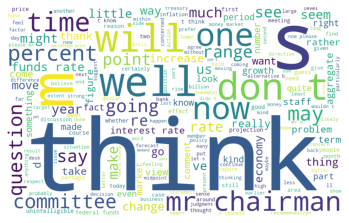

Wordcloud associé à la chair BURNS


In [421]:
df_statement = df_small.groupby('chair_in_charge')['statement'].apply(','.join)
nuage_de_mots(df_statement.iloc[[0]][0])  
print("Wordcloud associé à la chair BURNS")

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


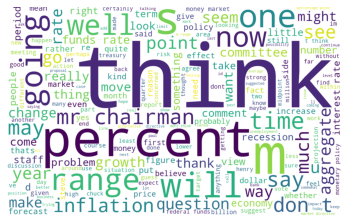

Wordcloud associé à la chair MILLER


In [422]:
nuage_de_mots(df_statement.iloc[[1]][0]) 
print("Wordcloud associé à la chair MILLER")

In [424]:
df_statement.iloc[[0]]['cleaned_statement'][0]

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'cleaned_statement'

In [195]:
df_statement

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


chair_in_charge
CHAIRMAN BURNS      we,are,ready,to,start,our,meeting,this,morning...
CHAIRMAN MILLER     well,he,can,join,us,when,he,arrives,first,we,c...
CHAIRMAN VOLCKER    i,might,say,for,the,benefit,of,those,who,have,...
Name: statement, dtype: object

### Tests de LDA 
#### Approche *bag of words*
- LDA sur l'ensemble des statements. 
- LDA sur Chair Burns, Chair Miller et Chair Greenspan

On a considéré comme document l'ensemble des statements ou l'ensemble des statements prononcé sous une chair (Burns, Miller ou Greenspan). 


In [183]:
#!pip install pyldavis

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn


def LDA_on_dataset(series, n_topic): #notre LDA prend en entrée le series.dataframe contenant l'information textuelle 
                                      #et le nombre de topic à modéliser
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(series)

    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
    lda.fit(tfidf)
    LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=n_topic, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

    tf_feature_names = tfidf_vectorizer.get_feature_names()

    return pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)



In [258]:
print('Statement : \n')
pyLDAvis.enable_notebook()
LDA_on_dataset(df_lda.cleaned_statement, 5)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statement : 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.157810  0.008014       1        1  56.890696
3      0.105286  0.178667       2        1  14.985557
4      0.131522  0.137375       3        1  11.606850
0      0.077030 -0.348080       4        1   8.483345
1     -0.471648  0.024024       5        1   8.033553, topic_info=          Term          Freq         Total Category  logprob  loglift
647  president  10440.000000  10440.000000  Default  30.0000  30.0000
878      thank   5894.000000   5894.000000  Default  29.0000  29.0000
368   governor   4495.000000   4495.000000  Default  28.0000  28.0000
991        yes   3444.000000   3444.000000  Default  27.0000  27.0000
586       okay   3283.000000   3283.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
606       page      0.195757    482.650526   Topic5 -12.0294  -5.2886
317    finally      0.193506    169.563184   Topic5 -12.0410  -4.2541
45      answer      0.194791    365.729799   Topic5 -12.0344  -5.0162
322      first      0.195730   1401.907640   Topic5 -12.0296  -6.3551
238        don      0.194186   1597.461956   Topic5 -12.0375  -6.4936

[299 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3         1  0.174981      accept
3         3  0.819424      accept
24        1  0.176634  aggregates
24        3  0.821734  aggregates
26        1  0.269788       agree
...     ...       ...         ...
989       4  0.401820        year
991       5  0.999723         yes
997       1  0.998259         you
998       1  0.019320       youre
998       4  0.980466       youre

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

In [251]:
df_burns = df_lda[df_lda.chair_in_charge == 'CHAIRMAN BURNS']
df_miller = df_lda[df_lda.chair_in_charge == 'CHAIRMAN MILLER']

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [255]:
print('Statement Burns : \n')
pyLDAvis.enable_notebook()
LDA_on_dataset(df_burns.cleaned_statement, 5)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statement Burns : 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.103025  0.019884       1        1  48.242706
3      0.122128  0.173416       2        1  18.392287
0      0.029734 -0.204654       3        1  16.517910
1     -0.394276  0.035087       4        1   9.586978
4      0.139388 -0.023734       5        1   7.260120, topic_info=       Term        Freq       Total Category  logprob  loglift
568      mr  572.000000  572.000000  Default  30.0000  30.0000
897   thank  272.000000  272.000000  Default  29.0000  29.0000
647  please  237.000000  237.000000  Default  28.0000  28.0000
898    that  269.000000  269.000000  Default  27.0000  27.0000
969    well  297.000000  297.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
365   going   14.845332  113.768059   Topic5  -4.8784   0.5863
963     way   13.173022   76.157216   Topic5  -4.9979   0.8681
601     one   12.043567  138.698717   Topic5  -5.0875   0.1790
355     get   11.702951   91.952807   Topic5  -5.1162   0.5613
281    even   11.545003   58.570160   Topic5  -5.1298   0.9988

[308 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         2  0.840347  accounts
5         3  0.076395  accounts
7         1  0.104696       act
7         3  0.889914       act
16        1  0.092740  adjusted
...     ...       ...       ...
997       5  0.500304       yet
999       1  0.379425       you
999       2  0.440622       you
999       3  0.146874       you
999       4  0.036719       you

[581 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

In [254]:
print('Statement Miller : \n')
pyLDAvis.enable_notebook()
LDA_on_dataset(df_miller.cleaned_statement, 5)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statement Miller : 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.071625 -0.061479       1        1  65.769742
4     -0.053794  0.296858       2        1  10.731505
3     -0.148441 -0.082027       3        1   9.567390
0      0.339093 -0.026251       4        1   7.659058
1     -0.065233 -0.127100       5        1   6.272304, topic_info=        Term        Freq       Total Category  logprob  loglift
872    thank  247.000000  247.000000  Default  30.0000  30.0000
992      yes  240.000000  240.000000  Default  29.0000  29.0000
141    chuck  109.000000  109.000000  Default  28.0000  28.0000
737    right  119.000000  119.000000  Default  27.0000  27.0000
874    thats  112.000000  112.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
328  foreign   20.028476   50.022509   Topic5  -4.1412   1.8537
563      new   15.653411   34.592611   Topic5  -4.3876   1.9761
482     line   15.689073   35.727537   Topic5  -4.3854   1.9461
178    could   16.514572   96.635508   Topic5  -4.3341   1.0023
958     well   12.956112  159.204653   Topic5  -4.5768   0.2604

[246 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        2  0.860648      agenda
24        1  0.979524  aggregates
29        1  0.036834        alan
29        2  0.847191        alan
29        3  0.073669        alan
...     ...       ...         ...
995       1  0.041333        york
995       5  0.909322        york
996       1  0.232631         you
996       2  0.021148         you
996       3  0.740188         you

[404 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

In [256]:
df_greenspan = df_lda[df_lda.chair_in_charge == 'CHAIRMAN GREENSPAN']

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
print('Statement Greenspan : \n')
pyLDAvis.enable_notebook()
LDA_on_dataset(df_greenspan.cleaned_statement, 5)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statement Miller : 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.193199  0.015443       1        1  40.456062
0      0.209096  0.008848       2        1  39.608957
3     -0.197378 -0.381319       3        1   6.860028
4      0.155182  0.094060       4        1   6.764059
2     -0.360099  0.262967       5        1   6.310895, topic_info=           Term         Freq        Total Category  logprob  loglift
645   president  4998.000000  4998.000000  Default  30.0000  30.0000
358    governor  2965.000000  2965.000000  Default  29.0000  29.0000
747       right  1108.000000  1108.000000  Default  28.0000  28.0000
886       thank  1075.000000  1075.000000  Default  27.0000  27.0000
887        that   997.000000   997.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
744     revised     0.283578    46.598261   Topic5 -10.4362  -2.3389
991         yes     0.289667  1034.924273   Topic5 -10.4150  -5.4182
949        vice     0.288644   416.676684   Topic5 -10.4185  -4.5120
224  discussion     0.287930   296.978092   Topic5 -10.4210  -4.1758
313       first     0.286796   389.133965   Topic5 -10.4249  -4.4500

[287 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
10        1  0.925301  activity
10        2  0.071177  activity
22        1  0.066081     agree
22        2  0.451174     agree
22        3  0.480797     agree
...     ...       ...       ...
991       2  0.096625       yes
997       1  0.123265       you
997       2  0.876551       you
998       2  0.984522     youre
998       5  0.009467     youre

[461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

On va chercher à observer/mesurer l'impact d'un changement de chair sur un membre ayant fait plusieurs chairs.

Les chairs se succèdent selon la temporalité suivante : 
- 08/1976 : Chair Burns
- 01/1978 : Chair Miller
- 08/1979 : Chair Volcker
- 08/1987 : Chair Greenspan
- 08/2006 : Chair Bernanke
- 01/2014 : Chair Yellen

Observons arbitrairement les individus tandem entre la chair Volcker et la chair Greenspan puis chair Bernanke et chair Greenspan. 

In [353]:
df.chair_in_charge = df.chair_in_charge.astype('string')

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sélection des statements de la chair Volcker et de la chair Greenspan. 

In [356]:
mask = (df.chair_in_charge == "CHAIRMAN VOLCKER") + (df.chair_in_charge == "CHAIRMAN GREENSPAN")
df1  = df[mask]
df1

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,interlocutor_name,statement _size,statement,statement_number,chair_in_charge,score_acadam,score_hostile,score_econo,score_virtue,...,No,Negate,SureLw,If,NotLw,RspGain,ABS,Causal,role_int,statement2
15170,1979-08-14,VOLCKER,636,"i,might,say,for,the,benefit,of,those,who,have,...",statement_0,CHAIRMAN VOLCKER,0.007862,0.022013,0.036164,0.051887,...,0.000000,0.006289,0.034591,0.018868,0.004717,0.001572,0.034591,0.020440,CHAIRMAN,i might say for the benefit of those who have ...
15171,1979-08-14,WALLICH,21,"is,it,possible,to,figure,out,the,unrealized,ga...",statement_1,CHAIRMAN VOLCKER,0.000000,0.000000,0.095238,0.000000,...,0.000000,0.047619,0.047619,0.095238,0.000000,0.000000,0.000000,0.095238,MR,is it possible to figure out the unrealized ga...
15172,1979-08-14,FARNSWORTH,25,"governor,wallich,i,have,with,me,today,dave,rob...",statement_2,CHAIRMAN VOLCKER,0.000000,0.080000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,MR,governor wallich i have with me today dave rob...
15173,1979-08-14,VOLCKER,11,"which,account,are,you,talking,about,the,domest...",statement_3,CHAIRMAN VOLCKER,0.000000,0.000000,0.090909,0.000000,...,0.000000,0.090909,0.090909,0.181818,0.000000,0.000000,0.000000,0.090909,CHAIRMAN,which account are you talking about the domest...
15174,1979-08-14,WALLICH,35,"domestic,on,the,foreign,side,i,take,it,that,th...",statement_4,CHAIRMAN VOLCKER,0.000000,0.000000,0.000000,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MR,domestic on the foreign side i take it that th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101794,2006-01-31,GREENSPAN,28,"i,gather,correctly,there’s,been,no,real,intere...",statement_164,CHAIRMAN GREENSPAN,0.000000,0.035714,0.071429,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.000000,0.071429,0.071429,CHAIRMAN,i gather correctly there’s been no real intere...
101795,2006-01-31,DANKER,185,"thank,you,mr,chairman,in,that,the,decision,has...",statement_165,CHAIRMAN GREENSPAN,0.010811,0.005405,0.048649,0.021622,...,0.000000,0.005405,0.059459,0.010811,0.000000,0.000000,0.032432,0.016216,MS,thank you mr chairman in that the decision has...
101796,2006-01-31,GREENSPAN,19,"i,request,the,federal,reserve,board,to,engage,...",statement_166,CHAIRMAN GREENSPAN,0.052632,0.000000,0.105263,0.052632,...,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,CHAIRMAN,i request the federal reserve board to engage ...
101797,2006-01-31,GREENSPAN,27,"the,federal,reserve,board,voted,unanimously,to...",statement_167,CHAIRMAN GREENSPAN,0.037037,0.000000,0.074074,0.037037,...,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.037037,CHAIRMAN,the federal reserve board voted unanimously to...


Sélection des individus ayant prononcé des statements sur les deux chair.

In [410]:
df1['Date_max']= df1.Date.copy()
df1.assign(Date_max=df1.Date)
df_interlocutor = df1.groupby('interlocutor_name').agg({'Date':'min', 'Date_max':'max', 'cleaned_statement':';'.join})

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-410-9792915c8b95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date_max']= df1.Date.copy()


SpecificationError: Column(s) ['cleaned_statement'] do not exist

In [406]:
mask_volcker = (df_interlocutor.Date.dt.strftime('%Y-%m') >= '1979-08') & (df_interlocutor.Date_max.dt.strftime('%Y-%m') < '1987-08')
mask_greenspan = (df_interlocutor.Date.dt.strftime('%Y-%m') >= '1987-08') & (df_interlocutor.Date_max.dt.strftime('%Y-%m') < '2006-08')
df_tandem = df_interlocutor[mask_volcker]

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Liste des personnes "tandem" sur les deux mandats de chair

In [403]:
pd.unique(df_tandem.index)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['ALTMA', 'ALTMANN', 'AXILROD', 'BALLES', 'BAUGHMAN', 'BECK',
       'BOHNE', 'BRADFIELD', 'COLDWELL', 'CZERWINSKI', 'DOYLE',
       'EASTBURN', 'ENZLER', 'ETTIN', 'FARNSWORTH', 'FORD', 'FOUSEK',
       'GAINOR', 'GARBARINI', 'GRALEY', 'GRAMLEY', 'GRIFFITH', 'HOLMES',
       'HORN', 'KEIR', 'KERAN', 'KICHLINE', 'KIMBREL', 'KIMEREL',
       'MANNION', 'MARTIN', 'MAYO', 'MCDONALD', 'MEEK', 'PARDEE',
       'PARTEE', 'PETERSEN', 'RICE', 'ROBINSON', 'ROOS', 'SCHULTZ',
       'SCWLTZ', 'SMOOT', 'SOLOMON', 'TEETERS', 'THIEKE', 'TIMLEN',
       'VOLCKER', 'VOLCKFR', 'VOLCRER', 'WALLACE', 'WALLICH', 'WILLES',
       'ZEISEL', 'ZICKLER'], dtype=object)

On va essayer d'implémenter une LDA sur ces individus pour le chair Greenspan et pour le chair Miller.

In [408]:
df_tandem.head()

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Date_max,statement
interlocutor_name,,,
ALTMA,1979-09-18,1979-10-06,"chairman,volcker,yes,president,balles,no,presi..."
ALTMANN,1979-08-14,1982-12-21,"yes,its,a,change,in,the,authorization,for,fore..."
AXILROD,1979-08-14,1986-04-01,"president,balles,its,a,measure,of,the,fiscal,p..."
BALLES,1979-08-14,1985-11-05,"ill,approach,it,from,a,different,way,and,make,..."
BAUGHMAN,1979-08-14,1980-12-19,"if,approved,when,it,is,announced,would,we,anno..."


In [409]:
print('Statement tandem : \n')
pyLDAvis.enable_notebook()
LDA_on_dataset(df_tandem.statement, 5)

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statement tandem : 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.006404 -0.000011       1        1  91.213428
0      0.001133 -0.000726       2        1   2.197260
2      0.001412  0.001216       3        1   2.197012
4      0.001680 -0.000160       4        1   2.196462
3      0.002180 -0.000319       5        1   2.195837, topic_info=        Term      Freq     Total Category  logprob  loglift
859      the  3.000000  3.000000  Default  30.0000  30.0000
885       to  1.000000  1.000000  Default  29.0000  29.0000
581       of  1.000000  1.000000  Default  28.0000  28.0000
857     that  1.000000  1.000000  Default  27.0000  27.0000
408       in  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
429     into  0.011563  0.448816   Topic5  -6.7426   0.1598
874     this  0.011755  0.679608   Topic5  -6.7261  -0.2386
95   because  0.011655  0.557825   Topic5  -6.7347  -0.0497
787       so  0.011573  0.622519   Topic5  -6.7417  -0.1665
135     cant  0.011567  0.459243   Topic5  -6.7423   0.1372

[279 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  1.400846    about
44        1  1.742936       an
46        1  0.712448      and
58        1  1.200575      are
65        1  1.153376       as
74        1  1.449184       at
94        1  1.091258       be
95        1  1.792677  because
129       1  1.532890      but
323       1  1.238441      for
371       1  1.597498      has
373       1  1.093235     have
393       1  1.397779       if
408       1  0.675347       in
433       1  0.898898       is
436       1  0.975079       it
567       1  1.436660      not
581       1  1.169992       of
587       1  1.174304       on
606       1  1.466160      our
627       1  1.289838  percent
787       1  1.606377       so
788       1  1.568292     some
800       1  1.735385    staff
857       1  1.113376     that
859       1  0.943721      the
863       1  1.400205    there
867       1  1.558789     they
871       1  1.396660    think
874       1  1.471437     this
885       1  1.084333       to
929       1  1.460596     very
940       1  1.561243      was
944       1  0.730039       we
954       1  1.607393     were
957       1  1.452677     what
963       1  1.739828    which
972       1  1.320934     with
987       1  1.097327    would
996       1  1.473622      you, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 5, 4])

#### Approche avec *word2vec*